# **Colab ব্যবহারকারীদের জন্য দ্রষ্টব্য**

# **এই ফাইলে সরাসরি লিখবেন না—আপনার কাজ হারিয়ে যেতে পারে!**

# **শুরু করার আগে সবসময় একটি কপি বানান।**

কপি কিভাবে করবেন

1. উপরের বাম দিকের “File”-এ ক্লিক করুন।  
> *“File” বা "Runtime" মতো হেডার না দেখলে, উপরের ডান পাশে “v” চিহ্নে ক্লিক করে দেখুন।*

2. "Save a copy in Drive" নির্বাচন করুন।

3. কপিযুক্ত ফাইলের নাম পরিবর্তন করে দিন “YOURNAMEs_FileName.ipynb” হিসেবে।  
> উদাহরণ: আপনার নাম যদি Olivia হয়: Olivias_FileName.ipynb

4. আপনার runtime **CPU** তে সেট করুন। T4 GPU CPU এর চেয়ে অনেক বেশি সেশন রিসেট করে।<br>  
   তাই ট্রেনিংয়ের জন্য না লাগলে CPU runtime ব্যবহার করাই ভালো।<br>  
   এই [Video](https://youtu.be/XRmI-qRiFFw) দেখুন।<br>

> যদি মাঝপথে runtime বদলান, তাহলে শুরু থেকে সব সেল আবার চালাতে হবে।<br>  
> শুরুতেই runtime ঠিক করে নিন।<br>  
> *সেল আবার চালানোর জন্য: “Runtime” (উপরে বাম) → “Run before” ক্লিক করুন।*<br>

---

* চেক মার্ক (✅) সংরক্ষণ হয় না। Chrome-এর refresh বাটনে পেজ রিলোড করলে তারা উধাও হয়ে যায়।<br>  
  পরে আবার চালিয়ে যেতে চাইলে একটি টেক্সট সেল যোগ করে “SO FAR DONE” লিখে রেখে দিন।

---

* Colab-এ **প্রতিটি আগের আউটপুট ৩০ থেকে ৯০ মিনিটে রিসেট হয়**।<br>  
  এজন্য `~~ is not defined` ধরনের ভুল বার বার দেখা দেয়।

  🔁 `~~ is not defined` ত্রুটি পেলে করণীয়  
  1. প্রথমে আপনার ভেরিয়েবলের বানান ঠিক আছে কিনা দেখুন।<br>  
  2. বানান ঠিক হলেও অর্থাৎ সমস্যা থাকলে, **যে সেলটি আবার চালাতে চান সেটাতে ক্লিক করুন**।<br>  
  3. “Runtime” (উপরে বাম) → “Run before” ক্লিক করুন।<br>  
     → এতে **আগের সব সেল আবার চালু হবে**।  
  4. এবার সেলটি আবার রান করুন।

  তবু সমস্যা থাকলে, আগের সেলগুলোতে আপনার TODO উত্তরগুলোতে ভুল থাকতে পারে।<br>  
  উত্তরগুলো ঠিক আছে কিনা ভালো করে দেখুন।<br>  
  অথবা ChatGPT বা অন্য কোনো কোডিং সহকারী থেকে সাহায্য নিন।

# **Preparation**

এই অংশে আগে থেকেই অধ্যায়গুলোর উপাদান লোড করা হবে।<br>
কোড চালান, পড়ার দরকার নেই।<br>
চিন্তা ছাড়া সামনে এগিয়ে যান।<br>

In [ ]:
# ফাইল ডাউনলোড করুন
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# আপনি যে input.text ফাইলটি ডাউনলোড করেছেন তা utf-8 ফরম্যাটে লোড করুন।
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# টেনসর সুন্দরভাবে প্রদর্শনের জন্য একটি ফাংশন (পড়তে না চাইলে বাদ দিতে পারেন)
import torch
import torch.nn as nn
import torch.nn.functional as F

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

--2025-07-08 11:25:56--  https://raw.githubusercontent.com/HayatoHongo/nanoGPT_todo/main/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2025-07-08 11:25:56 (31.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



# Chapter 12 Trainer Class

### Section 1: Class Definition

🔘 **Options**: থাকতে পারে আপনার দরকারের বাইরে অতিরিক্ত অপশন।  

`self.model`　`self.optimizer`　`self.data_loader`　`self.config`　`split_data`　`get_batch`　`'train'`, `'val'`　`input_batch`　`target_batch`　`logits`　`self.config.total_training_steps`　`self.config.evaluation_loops`  
`loss`　`backward()`　`self.train_step()`　`self.evaluate()`

In [ ]:
class Trainer:
    def __init__(self, model, optimizer, data_loader, config):
        self.model = model
        self.optimizer = optimizer
        self.data_loader = data_loader
        self.config = config

    def train_step(self):
        # প্রশিক্ষণের জন্য একটি ব্যাচ নিন।
        input_batch, target_batch = self.data_loader.get_batch('train')
        self.optimizer.zero_grad()

        # মডেলের ফরওয়ার্ড পাস এবং লস হিসাব
        logits, loss = self.model(input_batch, target_batch)
        loss.backward()  # ব্যাকপ্রোপাগেশন (ত্রুটি ব্যাকপ্রোপাগেশন)
        self.optimizer.step()  # প্যারামিটার আপডেট করুন

        return loss.item() # হারানের মান ফেরত দেয়

    def evaluate(self):
        self.model.eval()  # মূল্যায়ন মোডে সেট করুন
        losses = {"train": [], "val": []} # প্রশিক্ষণ ও যাচাইকরণ তথ্যের উপর ক্ষতি গণনা করুন
        with torch.no_grad():
            for split in ['train', 'val']:
                for _ in range(self.config.evaluation_loops):
                    input_batch, target_batch = self.data_loader.get_batch(split)
                    _, loss = self.model(input_batch, target_batch)
                    losses[split].append(loss.item())
        self.model.train()  # প্রশিক্ষণ মোডে ফিরে যান

        # প্রতিটি স্প্লিটের (train, val) গড় ক্ষতি হিসাব করুন
        return {split: sum(values) / len(values) for split, values in losses.items()}

    def train(self):
        # config এ নির্ধারিত সংখ্যক বার train_step চালান।
        for step in range(self.config.total_training_steps):

            # প্রতি ১০০ ইটারেশনে অথবা শুধু শেষ ধাপে মূল্যায়ন করুন।
            if step % self.config.evaluation_frequency == 0 or step == self.config.total_training_steps - 1:
                eval_loss = self.evaluate()
                print(f"Step {step}: Train Loss {eval_loss['train']:.4f}, Validation Loss {eval_loss['val']:.4f}")

            # প্রশিক্ষণের একটি ধাপ (প্রতিবার আপনি যে মূল প্রক্রিয়াটি করেন)
            train_loss = self.train_step()

In [ ]:
"""
class Trainer:
    def __init__(self, model, optimizer, data_loader, config):
        self.model = model
        self.optimizer = optimizer
        self.data_loader = data_loader
        self.config = config

    def train_step(self):
        # ট্রেনিংয়ের জন্য একটি ব্যাচ নিন।
        input_batch, target_batch = ___________._______(_____)
        self.optimizer.zero_grad()

        # মডেল ফরোয়ার্ড পাস এবং লস হিসাব
        logits, loss = _______(_________, __________)
        _____.__________  # ব্যাকপ্রপাগেশন (ত্রুটি ব্যাকপ্রপাগেশন)
        self.optimizer.step()  # প্যারামিটার আপডেট করুন

        return loss.item() # লসের মান ফেরত দেয়

    def evaluate(self):
        self.model.eval()  # মূল্যায়ন মোডে সেট করুন
        losses = {"train": [], "val": []} # প্রশিক্ষণ ও যাচাইকরণ ডেটায় ক্ষতি হিসাব করুন
        with torch.no_grad():
            for split in ['train', 'val']:
                for _ in range(self.config.evaluation_loops):
                    input_batch, target_batch = self.data_loader.get_batch(split)
                    _, loss = self.model(input_batch, target_batch)
                    losses[split].append(loss.item())
        self.model.train()  # প্রশিক্ষণ মোডে ফিরুন

        # প্রতিটি স্প্লিটের (train, val) গড় ক্ষতি হিসাব করুন
        return {split: sum(values) / len(values) for split, values in losses.items()}

    def train(self):
        # config-এ নির্দিষ্ট সংখ্যক train_step চালান।
        for step in range(_________________________):

            # প্রতি ১০০ ইটারেশনে বা শুধুমাত্র শেষ ধাপে মূল্যায়ন করুন।
            if step % self.config.evaluation_frequency == 0 or step == self.config.total_training_steps - 1:
                eval_loss = self.evaluate()
                print(f"Step {step}: Train Loss {eval_loss['train']:.4f}, Validation Loss {eval_loss['val']:.4f}")

            # প্রশিক্ষণের একটি ধাপ (প্রতিবার যে মূল প্রক্রিয়াটি করেন)
            train_loss = _____________
"""


'\nclass Trainer:\n    def __init__(self, model, optimizer, data_loader, config):\n        self.model = model\n        self.optimizer = optimizer\n        self.data_loader = data_loader\n        self.config = config\n\n    def train_step(self):\n        # Get a batch for training.\n        input_batch, target_batch = ___________._______(_____)\n        self.optimizer.zero_grad()\n\n        # Model forward pass and loss calculation\n        logits, loss = _______(_________, __________)\n        _____.__________  # Backpropagation (Error backpropagation)\n        self.optimizer.step()  # Update parameters\n\n        return loss.item() # Returns the value of the loss\n\n    def evaluate(self):\n        self.model.eval()  # Set to evaluation mode\n        losses = {"train": [], "val": []} # Calculate losses on both training and validation data\n        with torch.no_grad():\n            for split in [\'train\', \'val\']:\n                for _ in range(self.config.evaluation_loops):\n     

<details>
<summary>উত্তর দেখাতে/লুকাতে এখানে ক্লিক করুন</summary>

```python
class Trainer:
    def __init__(self, model, optimizer, data_loader, config):
        self.model = model
        self.optimizer = optimizer
        self.data_loader = data_loader
        self.config = config

    def train_step(self):
        # ট্রেনিংয়ের জন্য একটি ব্যাচ নিন।
        input_batch, target_batch = self.data_loader.get_batch('train')
        self.optimizer.zero_grad()

        # মডেলের ফরোয়ার্ড পাস এবং লস হিসাব
        logits, loss = self.model(input_batch, target_batch)
        loss.backward()  # ব্যাকপ্রোপাগেশন (ত্রুটি ফিরে যাওয়া)
        self.optimizer.step()  # প্যারামিটার আপডেট

        return loss.item() # লস এর মান রিটার্ন করে

    def evaluate(self):
        self.model.eval()  # মূল্যায়ন মোডে সেট করুন
        losses = {"train": [], "val": []} # ট্রেনিং ও ভ্যালিডেশন উভয় ডেটায় লস হিসাব করুন
        with torch.no_grad():
            for split in ['train', 'val']:
                for _ in range(self.config.evaluation_loops):
                    input_batch, target_batch = self.data_loader.get_batch(split)
                    _, loss = self.model(input_batch, target_batch)
                    losses[split].append(loss.item())
        self.model.train()  # আবার ট্রেনিং মোডে ফিরুন

        # প্রতিটি ভাগের গড় লস হিসাব করুন (train, val)
        return {split: sum(values) / len(values) for split, values in losses.items()}

    def train(self):
        # config-এ দেয়া সংখ্যার মত train_step চালান।
        for step in range(self.config.total_training_steps):

            # প্রতি ১০০ ধাপ পর পর বা শেষ ধাপে মূল্যায়ন করুন।
            if step % self.config.evaluation_frequency == 0 or step == self.config.total_training_steps - 1:
                eval_loss = self.evaluate()
                print(f"Step {step}: Train Loss {eval_loss['train']:.4f}, Validation Loss {eval_loss['val']:.4f}")

            # ট্রেনিংয়ের একটি ধাপ (প্রতি বার যা করবেন)
            train_loss = self.train_step()
```

**Chapter 11: Trainer Class: Section 1: Class Definition** <label><input type="checkbox"> Mark as Done</label>

### Section 2: Class Summary

Chapter 1 থেকে Chapter 11 পর্যন্ত সব ক্লাস পেস্ট করুন।<br>
**DeterministicDropout কে nn.Dropout দিয়ে রিপ্লেস করুন।**

[Watch the video!](https://youtu.be/j2ErzvlslKA)  
- কোনো অডিও নেই  
- ৪ মিনিট  

ভিডিওটিতে ফাইলের নাম answer_colab, কিন্তু সেটা মাথায় রাখবেন না।  

```python
AttentionHead: dropout = nn.Dropout(config.dropout_rate)
MultiHeadAttention: dropout = nn.Dropout(config.dropout_rate)
FeedForward:  nn.Dropout(config.dropout_rate)
```

In [ ]:
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # কনফিগারেশন অবজেক্ট
        chars = sorted(list(set(text)))  # অনন্য অক্ষর সাজানো হচ্ছে
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in enumerate(chars)}
        self.vocab_size = len(chars)

        # এনকোড করুন এবং টেনসরে রূপান্তর করুন।
        # এই `__init__` মেথডের বাইরে অন্য মেথড বা আর্গুমেন্ট কল করতে `self.` প্রয়োজন।
        self.data = torch.tensor(self.encode(text), dtype=torch.long)

        # প্রশিক্ষণ/যাচাইকরণ ডেটায় ভাগ করুন।
        # `self.data` ডিফল্ট হিসেবে ব্যবহৃত হয় যদি কোনো আর্গুমেন্ট না দেওয়া হয়।
        self.train_data, self.val_data = self.split_data()

    def encode(self, text):
        # একটি স্ট্রিংকে ইনডেক্স কলামে রূপান্তর করে। অন্যান্য মেথড বা আর্গুমেন্ট কল করতে `self.` প্রয়োজন।
        return [self.ctoi[c] for c in text]

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = int(0.9 * len(self.data))  # 90% ডেটা ট্রেনিংয়ের জন্য ভাগ করার পয়েন্ট।
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
        start_indices = torch.randint(len(data) - self.config.input_sequence_length, (self.config.batch_size,)) # উৎপন্ন করুন এক্সট্র্যাক্ট শুরু সূচক

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)


class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # vocabulary নম্বর x embedding মাত্রার জন্য একটি এমবেডেড টেবিল সংজ্ঞায়িত করুন
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # ইনপুট ইনডেক্সের সাথে সম্পর্কিত এমবেডেড ভেক্টর পান
        return self.token_embedding_table.forward(input_indices)

class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length = 8, embedding_dim = 8):
        super().__init__()
        # অবস্থান এমবেডিং স্তর
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        # ইনপুট টেনসর input_indices এর আকৃতি: [ব্যাচ সাইজ, সিকোয়েন্স দৈর্ঘ্য].
        sequence_length = input_indices.shape[1]

        # ক্রমের দৈর্ঘ্য অনুযায়ী অবস্থান সূচক তৈরি করুন (যেমন [0, 1, 2, ..., sequence_length-1])
        position_indices = torch.arange(sequence_length, device=input_indices.device)

        # অবস্থান সূচকের জন্য এম্বেডেড ভেক্টর নিন
        position_embeddings = self.position_embedding_layer.forward(position_indices)

        return position_embeddings

class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এমবেডেড লেয়ার
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # শব্দ এম্বেডিং স্তর
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # অবস্থান তথ্য এম্বেড করুন

    def forward(self, input_indices):
        # টোকেন এমবেডিং নিন
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এমবেডিং নিন
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # টোকেন এমবেডিং এবং অবস্থান এমবেডিং যোগ করা হচ্ছে
        embeddings = position_embeddings + token_embeddings
        return embeddings

class LayerNorm(nn.Module):  # এখানে nn.Module থেকে উত্তরাধিকার গ্রহণ করুন
    def __init__(self, token_length, eps=1e-5, norm_dim=-1):
        super().__init__()
        self.eps = eps
        self.norm_dim = norm_dim

        # gamma ও beta কে nn.Parameter হিসেবে নিবন্ধন করুন যাতে CPU ও CUDA উভয়েই ব্যবহার করা যায়।
        self.gamma = nn.Parameter(torch.ones(token_length))
        self.beta = nn.Parameter(torch.zeros(token_length))

    def forward(self, x):
        mean = torch.mean(x, dim=self.norm_dim, keepdim=True)
        var = torch.var(x, dim=self.norm_dim, keepdim=True, unbiased=False)
        hat = (x - mean) / torch.sqrt(var + self.eps)
        output =  self.gamma * hat + self.beta
        return output


class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(config.embedding_dim, head_size, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # মাস্ক নিচু ত্রিভুজাকৃতির ম্যাট্রিক্স ব্যবহার করে তৈরি করা হয় (self-attention-এর কারণিকতা বজায় রেখে)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # ড্রপআউট (নির্ধারিত সংস্করণ আলাদাভাবে সংজ্ঞায়িত)
        self.dropout = nn.Dropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # ব্যাচ, টোকেন দৈর্ঘ্য, এম্বেডিং চ্যানেল

        Key = self.key_fc.forward(input_tensor)     # (বি, টি, হেড_সাইজ)
        Query = self.query_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)
        Value = self.value_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)

        # অ্যাটেনশন স্কোর গণনা করা হচ্ছে (QK^T) / sqrt(embedding_dim)
        attention_weights_before_mask = Query @ Key.transpose(-2, -1) * self.head_size**(-0.5)

        # মাস্ক প্রয়োগ হয়েছে
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(mask == 1, float('-inf'))

        # সফটম্যাক্স → ড্রপআউট → ওজনযুক্ত যোগফল
        attention_weights = F.softmax(masked_attention_weights, dim=-1)
        attention_weights = self.dropout(attention_weights)

        out = attention_weights @ Value  # (বি, টি, হেড_সাইজ)
        return out


class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.num_attention_heads = config.num_attention_heads
        self.embedding_dim = config.embedding_dim
        self.head_size = int(self.embedding_dim / self.num_attention_heads)

        # ModuleList দিয়ে একাধিক হেড পরিচালনা করুন
        self.attention_heads = nn.ModuleList([
            AttentionHead(self.head_size, config)
            for _ in range(self.num_attention_heads)
        ])

        # প্রতিটি হেডের আউটপুট মিশ্রণের জন্য লিনিয়ার লেয়ার
        self.output_projection = nn.Linear(self.embedding_dim, self.embedding_dim)

        # আউটপুটের জন্য ড্রপআউট
        self.dropout = nn.Dropout(config.dropout_rate)

    def forward(self, input_tensor):
        # প্রত্যেক হেড থেকে আউটপুট নিন
        # (B, T, head_size) এর তালিকা
        head_outputs_list = [head.forward(input_tensor) for head in self.attention_heads]

        # সব হেডের আউটপুট একত্রিত করুন → (B, T, embedding_dim)
        concatenated = torch.cat(head_outputs_list, dim=-1)

        # আউটপুটকে লিনিয়ার ট্রান্সফরমেশনের সাথে মেশানো
        projected = self.output_projection.forward(concatenated)

        # চূড়ান্ত আউটপুটে ড্রপআউট প্রয়োগ করুন
        output = self.dropout.forward(projected)

        return output

class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(config.embedding_dim, config.hidden_dim),
            nn.ReLU(),
            nn.Linear(config.hidden_dim, config.embedding_dim),
            nn.Dropout(config.dropout_rate),
        )

    def forward(self, input_tensor):
        return self.net(input_tensor)

class TransformerBlock(nn.Module):
    def __init__(self, config):
        super().__init__()

        # প্রতিটি LayerNorm অবজেক্ট তার নিজস্ব স্কেলিং প্যারামিটার beta এবং gamma সংরক্ষণ করে।
        self.layer_norm1 = nn.LayerNorm(config.embedding_dim)
        self.layer_norm2 = nn.LayerNorm(config.embedding_dim)

        self.multihead_attention = MultiHeadAttention(config=config)
        self.feed_forward = FeedForward(config=config)

    def forward(self, input_tensor):
        # forward মেথড বাদ দেওয়া হয়েছে।
        normed_input = self.layer_norm1(input_tensor) # ইনপুটে Layer Norm প্রয়োগ করুন
        attention_output = self.multihead_attention(normed_input) # মাল্টি-হেড অ্যাটেনশন প্রয়োগ করুন
        residual_attention = attention_output + input_tensor # "before! layernorm1 যোগ করুন
        normed_attention = self.layer_norm2(residual_attention) # রেসিডুয়াল আউটপুটে আবার LayerNorm প্রয়োগ করুন
        feedforward_output = self.feed_forward(normed_attention) # ফিডফরোয়ার্ড নেটওয়ার্ক (FFN) প্রয়োগ করুন
        final_output = feedforward_output + residual_attention # "before" layernorm2 যোগ করুন!

        return final_output

class VocabularyLogits(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # লেয়ার নরমালাইজেশন
        self.output_norm = nn.LayerNorm(config.embedding_dim)
        # শব্দভাণ্ডারের আকারে প্রক্ষেপণ
        self.vocab_projection = nn.Linear(config.embedding_dim, vocab_size)

    def forward(self, transformer_block_output):
        # Transformer ব্লক থেকে প্রাপ্ত আউটপুটে Layer normalization প্রয়োগ করুন।
        normalized_output = self.output_norm.forward(transformer_block_output)  # (বি, টি, সি)

        # স্কোরগুলোকে একটি লিনিয়ার লেয়ার ব্যবহার করে শব্দভাণ্ডারের আকারের মাত্রায় প্রক্ষেপণ করে।
        vocab_logits = self.vocab_projection.forward(normalized_output)  # (বি, টি, ভি)

        return vocab_logits

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        self.config = config  # এটি জেনারেট করার সময়ও ব্যবহৃত হয়, তাই রাখবেন।
        self.embedding = EmbeddingModule(vocab_size, config=config)
        self.blocks = nn.Sequential(*[TransformerBlock(config=config) for _ in range(config.layer_count)])
        self.vocab_projection = VocabularyLogits(vocab_size=vocab_size, config=config)
        self.criterion = nn.CrossEntropyLoss()

    # টেক্সট তৈরি করুন
    def generate(self, input_indices, max_new_tokens):
        # নির্দিষ্ট সংখ্যক টোকেন `max_new_tokens` তৈরি করুন
        for _ in range(max_new_tokens):
            input_conditioned = input_indices[:, -self.config.input_sequence_length:] # ইনপুট ক্লিপ করুন

            # ফরওয়ার্ড পাস `(likelihood, loss)` ফেরত দেয়—শুধুমাত্র `likelihood` কে `logits` হিসেবে সংরক্ষণ করুন।
            logits, _ = self.forward(input_conditioned, target_indices=None)
            last_logits = logits[:, -1, :] # শেষ টোকেন অবস্থানের জন্য লগিট বের করুন
            probs = F.softmax(last_logits, dim=-1) # Softmax দিয়ে সম্ভাবনা হিসাব করুন

            # পরবর্তী টোকেন নির্বাচন করুন
            next_token = torch.multinomial(probs, num_samples=1)

            # নতুন টোকেনগুলো একত্রিত করুন, `input_indices` আপডেট করুন।
            input_indices = torch.cat((input_indices, next_token), dim=1)

        # মূল `input_indices` এবং `max_new_tokens` যোগফল দৈর্ঘ্যের শেষ `input_indices` ফেরত দেয়।
        return input_indices

    # সম্ভাবনা এবং ক্ষতি হিসাব করুন
    def forward(self, input_indices, target_indices):
        embeddings = self.embedding(input_indices)
        blocks_output = self.blocks(embeddings)
        logits = self.vocab_projection(blocks_output)

        # ইনফারেন্সে কোনো টার্গেট থাকে না, তাই লস `None` হয়।
        # —শুধুমাত্র সম্ভাবনা (logits) ফেরত দেওয়া হয়।
        if target_indices is None:
            return logits, None

        batch_size, token_len, vocab_size = logits.shape
        logits = logits.view(batch_size * token_len, vocab_size)
        targets = target_indices.view(batch_size * token_len)
        loss = self.criterion(logits, targets)

        return logits, loss

**DeterministicDropout-এর জায়গায় nn.Dropout ব্যবহার করুন**
```python
AttentionHead: dropout = nn.Dropout(config.dropout_rate)
MultiHeadAttention: dropout = nn.Dropout(config.dropout_rate)
FeedForward:  nn.Dropout(config.dropout_rate)
```
<label><input type="checkbox"> Done</label>

**Chapter 12: Trainer Class: Section 2: ক্লাস সারসংক্ষেপ** <label><input type="checkbox"> Mark as Done</label>

### Section 3: Training and Inference

এখন পর্যন্ত, embedding dimension ছিল 8, দুটি attention heads সহ, এবং FeedForward Network-এ 16-dim hidden layers ছিল।<br>
এটা ভালো প্রকাশের জন্য খুব সীমিত।<br>
এখন, embedding dimension 64 সেট করুন, 4 attention heads সহ এবং FeedForward Network-এ 256-dim hidden layers রাখুন।

In [ ]:
# মডেল সেটিংস সংরক্ষণকারী কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 16  # একবারে প্রক্রিয়াজাত করার ডেটার পরিমাণ (ব্যাচ সাইজ)
    input_sequence_length = 32  # ইনপুট ডেটার দৈর্ঘ্য (সিকুয়েন্স দৈর্ঘ্য)
    total_training_steps = 5000  # সর্বোচ্চ প্রশিক্ষণের সংখ্যা (ধাপের সংখ্যা)
    evaluation_frequency = 100  # মডেল কর্মক্ষমতা মূল্যায়নের ফ্রিকোয়েন্সি
    learning_rate = 0.001  # শিক্ষণ হার
    device_type = 'cuda' if torch.cuda.is_available() else 'cpu'  # ব্যবহারের ডিভাইস (GPU বা CPU)
    evaluation_loops = 10  # মূল্যায়নের সময় পুনরাবৃত্তির সংখ্যা
    embedding_dim = 64  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)
    hidden_dim = 256
    num_attention_heads = 4  # নোট মেকানিজম হেড নম্বর
    layer_count = 4  # মডেলের স্তরের সংখ্যা
    dropout_rate = 0.1  # ড্রপআউট সম্ভাবনা
    random_seed_value = 1337  # পুনরুত্পাদনের জন্য র্যান্ডম নম্বর সীডসমূহ

# আপনার সেটিংস যাচাই করুন
config = ModelConfig()

print("ModelConfig ক্লাসের প্রতিটি সেটিং:")
print(f"Batch size: {config.batch_size}")
print(f"Input sequence length: {config.input_sequence_length}")
print(f"Total training steps: {config.total_training_steps}")
print(f"Evaluation frequency (in steps): {config.evaluation_frequency}")
print(f"Learning rate: {config.learning_rate}")
print(f"Device in use: {config.device_type}")
print(f"Number of evaluation loops: {config.evaluation_loops}")
print(f"Embedding vector dimension: {config.embedding_dim}")
print(f"Hidden layer dimension of the feedforward network: {config.hidden_dim}")
print(f"Number of attention heads: {config.num_attention_heads}")
print(f"Number of model layers: {config.layer_count}")
print(f"Dropout rate: {config.dropout_rate}")
print(f"Random seed value: {config.random_seed_value}")

Each setting for the ModelConfig class:
Batch size: 16
Input sequence length: 32
Total training steps: 5000
Evaluation frequency (in steps): 100
Learning rate: 0.001
Device in use: cuda
Number of evaluation loops: 10
Embedding vector dimension: 64
Hidden layer dimension of the feedforward network: 256
Number of attention heads: 4
Number of model layers: 4
Dropout rate: 0.1
Random seed value: 1337


**`Check Point`**
<label><input type="checkbox"> নিশ্চিত করুন Config ক্লাসের প্রতিটি সেটিং সঠিকভাবে দেখাচ্ছে<br></label>
- ব্যাচ সাইজ: 16<br>
- ব্লক সাইজ: 32<br>
- সর্বোচ্চ ইনটারেশন: 5000<br>
- মূল্যায়ন ইন্টারভ্যাল: 100<br>
- লার্নিং রেট: 0.001<br>
- ইউজড ডিভাইস: cuda বা cpu<br>
- মূল্যায়ন ইনটারেশনের সংখ্যা: 10<br>
- এম্বেডিং লেয়ারের মাত্রা: 64<br>
- ফিডফরোয়ার্ড হিডেন মাত্রা: 256<br>
- অ্যাটেনশন হেডের সংখ্যা: 4<br>
- মডেল লেয়ারের সংখ্যা: 4<br>
- ড্রপআউট রেট: 0.1<br>
- সীড ভ্যালু: 1337<br>

In [ ]:
# কনফিগারেশন লোড করুন এবং সিড সেট করুন
config = ModelConfig()
torch.manual_seed(config.random_seed_value)  # পুনরুত্পাদন নিশ্চিত করতে র‍্যান্ডম নম্বর সীড সেট করুন

In [ ]:
# ডেটা লোড করুন
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text_data = f.read()
data_loader = DataLoader(text_data, config)

In [ ]:
# মডেল ও অপ্টিমাইজার শুরু করুন
model = BigramLanguageModel(vocab_size = data_loader.vocab_size, config = config).to(config.device_type)  # আপনি যে ডিভাইসটি ব্যবহার করেন তা নির্দিষ্ট করুন
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)

# মডেলের প্যারামিটার সংখ্যা প্রিন্ট করুন
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

0.209729 M parameters


তুলনামূলকভাবে, GPT2-Small মডেলের ১১৭M (বা ১২৪M) প্যারামিটার রয়েছে।

এক্সপেরিমেন্ট হিসেবে, প্রি-ট্রেনিং ধাপে জেনারেশন করার চেষ্টা করুন।

In [ ]:
text = "Let's he"  # প্রম্পট
initial_context = torch.tensor(data_loader.encode(text), dtype=torch.long)
# unsqueeze(0) দিয়ে ব্যাচ ডাইমেনশন যোগ করুন (ব্যাচ সাইজ=1)
initial_context_unsqueeze = initial_context.unsqueeze(0)
# ↓ মূল কথা হলো এটি আপনি যে ডিভাইস ব্যবহার করছেন (CPU বা GPU)-তে সরানো!
initial_context_unsqueeze = initial_context_unsqueeze.to(config.device_type)

# উত্পাদন শুরু করুন
generated_sequence_initial = model.generate(initial_context_unsqueeze, max_new_tokens=500)
print(data_loader.decode(generated_sequence_initial[0].tolist()))

Let's henvIeuW;JcijkeLWfUaUJW;VcE!Pf;ocFF&oNhq$eQLJOOEFWXgjNhhqv;Es
iowD&ZqK&CgwN'Pq$mFHGjX.esumfonqUzgrN?pNVvN!Iebiqfs!EuOt3Zw?Bjx$oYk-wXmvevRibdVde!eJgRLKasNnge?DEYpK! 'scfoOl!Ebe$iol$-UpfXGKtewgLMsO!?fX?&D?;-$zBR.SudGdOo.&co
zvzNqQriRR'QbHbs'QqXghiHWJwLUEZE&pNz
T'Rk!ZgbN?tmE.uJaekBK?Oh&n&Um,LDqc'omcC&Z;xpZGipgRQeN$y?VDbOvsN,$IcNhepTHJeWkzKdrf?roHm?dfwFUpwMVg;ei&$RCXTyowaFZhjVBm$3g33cAuh,K?UlAGcX;p!JUlNvvbIHG.3inUc.HjMCsyhnpwAKylbSHT'pXh3UNfO:mreo'VrL'cpe-NC,ntZAziOpKcpTOE.hs:Ck&z'LGJgyb3?p!3fI,OjzFHE


হুম, এটা তো একটা কম্পিউটার💻, তাই না?

ঠিক আছে, তাহলে চল সেটাকে ট্রেন করি আর ছোট বাচ্চার মতো বড় করি👶!

**সবশেষে আমরা পৌঁছে গেছি শেষ পর্বে। শুরু করছি [emotional BGM¹](https://youtu.be/GqmAe0QfkjU?feature=shared)।<br>ট্রেনিং হবে আনুমানিক ২ থেকে ৪ মিনিট। চলুন এই মুহূর্তে মগ্ন হয়ে যাই।**

---

Content Reference:  
¹ **DooPiano**, “BTS (방탄소년단) – 봄날 (Spring Day) Piano & String Orchestra Version,” YouTube, 3:41, published ~8.2 years ago (circa 2017). Accessed July 8 2025.

---

**একটু হলেও BGM শুনতে ভুলবেন না! নিশ্চিতভাবেই মন ছুঁয়ে যাবে! এবার, নিচের সেলটি চালিয়ে ট্রেনিং শুরু করুন!**

In [ ]:
print("===প্রশিক্ষণ সফলভাবে শুরু হয়েছে===")

# মডেল প্রশিক্ষণ দিন
trainer = Trainer(model, optimizer, data_loader, config)
trainer.train()

# মডেল সংরক্ষণ করা হচ্ছে
save_path = "bigram_language_model.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, save_path)

print("প্রশিক্ষণ সম্পন্ন হয়েছে")
print(f"Model and optimizer state saved to {save_path}")

===TRAINING STARTED SUCCESSFULLY===
Step 0: Train Loss 2.3080, Validation Loss 2.3095
Step 100: Train Loss 2.2592, Validation Loss 2.2887
Step 200: Train Loss 2.2122, Validation Loss 2.2228
Step 300: Train Loss 2.1850, Validation Loss 2.1929
Step 400: Train Loss 2.1433, Validation Loss 2.1610
Step 500: Train Loss 2.0731, Validation Loss 2.1434
Step 600: Train Loss 2.0713, Validation Loss 2.1265
Step 700: Train Loss 2.0781, Validation Loss 2.0784
Step 800: Train Loss 2.0399, Validation Loss 2.1171
Step 900: Train Loss 1.9939, Validation Loss 2.0921
Step 1000: Train Loss 2.0463, Validation Loss 2.0800
Step 1100: Train Loss 2.0031, Validation Loss 2.0437
Step 1200: Train Loss 1.9710, Validation Loss 2.0322
Step 1300: Train Loss 1.8837, Validation Loss 2.0148
Step 1400: Train Loss 1.9525, Validation Loss 2.0299
Step 1500: Train Loss 1.9432, Validation Loss 2.0055
Step 1600: Train Loss 1.9284, Validation Loss 1.9633
Step 1700: Train Loss 1.9180, Validation Loss 1.9909
Step 1800: Train Loss 

In [ ]:
# ---- সংরক্ষিত মডেল লোড হচ্ছে এবং টেক্সট তৈরি হচ্ছে -----
# নতুন মডেল ও অপটিমাইজার শুরু করুন (একই সেটিংস ও ক্লাস ডেফিনিশন প্রয়োজন)
loaded_model = BigramLanguageModel(vocab_size = data_loader.vocab_size, config = config).to(config.device_type)  # আপনার ব্যবহৃত ডিভাইস উল্লেখ করুন
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=config.learning_rate)

save_path = "bigram_language_model.pth"
checkpoint = torch.load(save_path, map_location=config.device_type)
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print("===== মডেল সফলভাবে লোড হয়েছে! =====")

===== Model Loaded Successfully!=====


মডেলকে evaluation মোডে সেট করুন। জেনারেশনের আগে Dropout বন্ধ করে দিন।

ভুলে গেলে Dropout চালু হয়ে যায়। তখন আউটপুট খারাপ হবে, তাই সাবধান থাকুন।

In [ ]:
loaded_model.eval()
print("===== ইভ্যালুয়েশন মোডে সেট করা হয়েছে, ড্রপআউট নিষ্ক্রিয়। =====")

===== Set to Evaluation mode, disabled Dropout. =====


In [ ]:
prompt = "Let's he"  # প্রম্পট
encoded_prompt = torch.tensor(data_loader.encode(prompt), dtype=torch.long)
print_formatted_tensor("এনকোড করা প্রম্পট", encoded_prompt)

encoded_prompt
Tensor Size: [8]
tensor([
         24.00,  43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00
       ])


In [ ]:
# unsqueeze(0) দিয়ে ব্যাচ মাত্রা যোগ করুন (ব্যাচ সাইজ=1)
encoded_prompt_unsqueeze = encoded_prompt.unsqueeze(0)
print_formatted_tensor("এনকোডেড_প্রম্পট_আনসকুইজ", encoded_prompt_unsqueeze)

encoded_prompt_unsqueeze
Tensor Size: [1, 8]
tensor([
         [ 24.00,  43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00]
       ])


In [ ]:
# ↓ মূল কথা হল প্রম্পট টেনসরটি আপনি যে ডিভাইস ব্যবহার করছেন (CPU বা GPU) সেখানে সরিয়ে নেওয়া!
encoded_prompt_unsqueeze = encoded_prompt_unsqueeze.to(config.device_type)

```python
Instance: loaded_model
Method: generate
Arguments: encoded_prompt_unsqueeze, max_new_tokens=1000
```

In [ ]:
# উৎপাদন শুরু করুন
generated_sequence = loaded_model.generate(encoded_prompt_unsqueeze, max_new_tokens=1000) # TODO: উদাহরণ,
print(data_loader.decode(generated_sequence[0].tolist()))

Let's he weath to begiver thing thou are perpisency the gertater sing
To With beenes; no from to the chaul!

JUTIO:
Were this not the carence your in singrard hath lond
Capus leet.

BRUTUS:
Thee bust to me to speaks or his it,

Deseetock untertay laid I wand for shing
that ittience, God nig for the from do it it.

Pervore, I sethall thou breather,
By tyre agent man some thou my servery plaid be the spoble.

GLOUCESTER:
Shallo, Say fauls I weick.

DUCESTER MARGAREY:
My noble thear, an, and at to he's guend
For me full I say's be swould Gentleat haph till
Nor And being years their rlancues
The Last burssened to her be gry our sto stoot
Ands that nurse steep
Of aund will of her age man, tiSingment your boy's rings:
Your my and again and well I would theur ady
A samernon to do time'n sail thou lack your juty,
No? I coundertife thou have thee other awarthrough a dne'd I preaty
Waveichard him time if our good bowers highne:
Thears.

Thidds; and I' weal theseity. Bollow Richions:
As City you?

এবার nanoGPT দিয়ে কম্পিউটার💻 থেকে একটা ছোট বাচ্চার👶 পর্যায়ে উঠলো।

এরপর, GPT2 ছোট বাচ্চা👶 থেকে মাধ্যমিক ছাত্র🧑-এর দিকে পা বাড়াবে!

**Chapter 12: Trainer Class: Section 3: Training and Inference** <label><input type="checkbox"> Mark as Done</label>

**Chapter 12: The Trainer Class** <label><input type="checkbox"> Mark as Done</label>

**`nanoGPT`** <label><input type="checkbox"> সম্পন্ন</label>

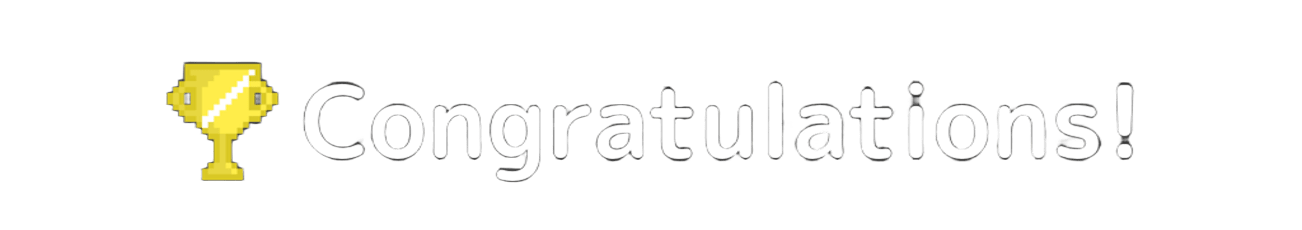